# Overfitting Problem
#### Here you need to create a model that overfits, then use different methods to avoid it

### Import libraries

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Generate Sample Data

In [27]:
# This function generates random data for 2 different classes

np.random.seed(0xdeadbeef)

def make_sample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = sigma**2.
    # below, we provide the coordinates of the mean as 
    # a first argument, and then the covariance matrix
    # which describes the width of the Gaussian along the 
    # two directions.
    # we generate nexamples examples for each category
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

In [28]:
# Don't change the number of samples for your first model.
# After that (For your second model) you can play with the numbers to see how increasing your dataset helps to avoid overfitting

sgx, sgy = make_sample(30)

Text(0, 0.5, 'x2')

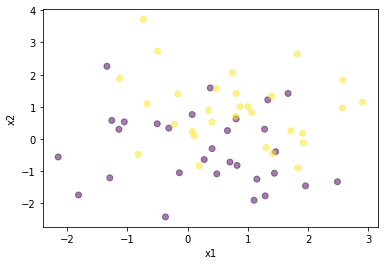

In [29]:
# note how the two categories are plotted
# together in one go by providing the 
# label array as color argument (c=sgy)

plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

### Import Keras

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

### Create a model that overfits

In [31]:
# Create a Sequential MLP model with these Dense layers:
# 3 hidden layers with 50 units each and 'relu' activation
# 1 unit output with 'softmax' activation


########################
## PUT YOUR CODE HERE ##
########################
model = Sequential()

model.add(Dense(50, activation='relu', input_shape=sgx[0].shape))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                150       
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.2, random_state=42)

In [33]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
########################
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

In [34]:
# Start training and fit your model with desired parameters and validation_split=0.2

########################
## PUT YOUR CODE HERE ##
########################
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=500,
                    validation_split=0.2,
                    verbose=0)

### Plot Your Results

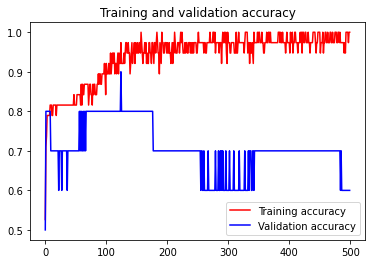

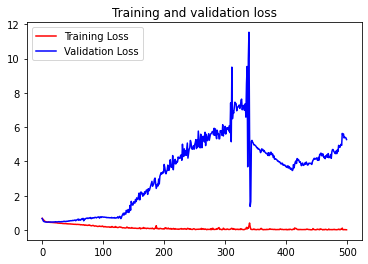

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate your model

In [36]:
# Evaluate your model with train and test data


########################
## PUT YOUR CODE HERE ##
########################
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 97ms/step - loss: 15.5361 - accuracy: 0.5833


[15.536055564880371, 0.5833333134651184]

# Now you need to use your knowledge and methods (Regularization, Dropout, etc) to prevent overfitting and then evaluate and compare your results

#regularization

In [52]:
model2 = Sequential()

model2.add(Dense(50, activation='relu', kernel_regularizer='l2', input_shape=sgx[0].shape))
model2.add(Dense(50, activation='relu', kernel_regularizer='l2'))
model2.add(Dense(50, activation='relu', kernel_regularizer='l2'))
model2.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))

model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 50)                150       
                                                                 
 dense_33 (Dense)            (None, 50)                2550      
                                                                 
 dense_34 (Dense)            (None, 50)                2550      
                                                                 
 dense_35 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


In [53]:
model2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [54]:
history = model2.fit(X_train, y_train,
                    batch_size=1,
                    epochs=500,
                    validation_split=0.2,
                    verbose=0)

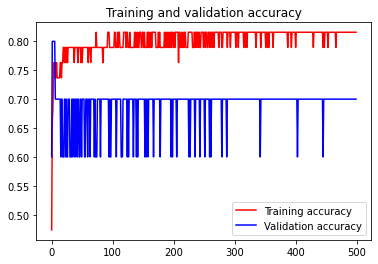

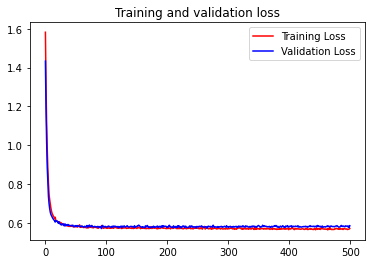

In [55]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 119ms/step - loss: 0.6787 - accuracy: 0.8333


[0.6786808967590332, 0.8333333134651184]

# dropout

In [42]:
from keras.layers import Dropout

model3 = Sequential()

model3.add(Dense(50, activation='relu', input_shape=sgx[0].shape))
model3.add(Dropout(0.2))
model3.add(Dense(50, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(50, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                150       
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_26 (Dense)            (None, 50)                2550      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                

In [43]:
model3.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

In [44]:
history = model3.fit(X_train, y_train,
                     batch_size=1,
                     epochs=500,
                     validation_split=0.2,
                     verbose=0)

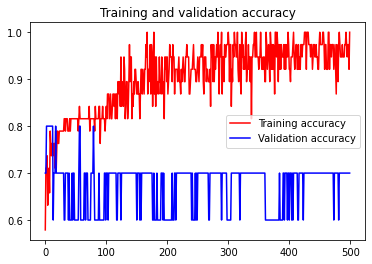

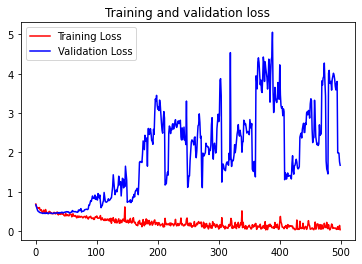

In [45]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
model3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 92ms/step - loss: 8.7425 - accuracy: 0.6667


[8.74245834350586, 0.6666666865348816]

# Early Stopping

In [47]:
model4 = Sequential()

model4.add(Dense(50, activation='relu', input_shape=sgx[0].shape))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [48]:
model4.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)

history = model4.fit(X_train, y_train,
                     batch_size=1,
                     epochs=500,
                     validation_split=0.2,
                     callbacks=[callback],
                     verbose=0)

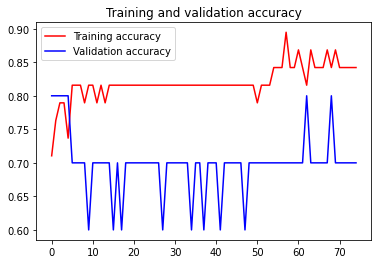

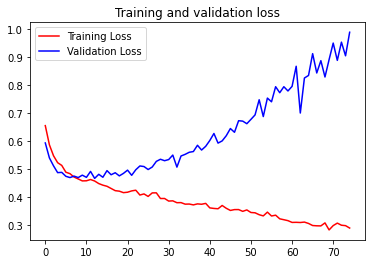

In [51]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
model4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 105ms/step - loss: 2.4701 - accuracy: 0.8333


[2.470087766647339, 0.8333333134651184]